In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
%matplotlib inline

In [2]:
resolution = 12
peak_voltage = 1.5/2*u.V
R_in = 1*u.kOhm
C_in = 3.3 *u.pF

First simulate a single complex tone wavefunction being transmitted through the ADC

In [17]:
t = np.r_[0:1e6:1e6j]*u.us
N = len(t)
def get_tone(f, factor):
    phi = (2*pi*f*t).to(1)*u.rad
    phi_noise = np.random.randn(N) * 0.1 * u.rad
    I = digitize((peak_voltage/factor) * np.cos(phi + phi_noise))
    Q = digitize((peak_voltage/factor) * np.sin(phi + phi_noise))
    y = I + Q
#     y[y > peak_voltage] = peak_voltage
#     y[y < -peak_voltage] = -peak_voltage
    return I,Q,y
def get_tone_power(f, y):
    Z = R_in + 1j/(2*pi*f*C_in)
    P = ((y**2/np.abs(Z)**2)*R_in).to(u.W)
    return P

In [18]:
dV = 2*peak_voltage/2**resolution
levels = np.arange(2**resolution)
def digitize(y):
    return (y // dV + 0.5) *dV
def toADCunits(y):
    return (y / dV).value + 2**resolution/2

In [19]:
f = 250 * u.MHz
I,Q,y = get_tone(f, 2**0.5)
P = get_tone_power(f, y)

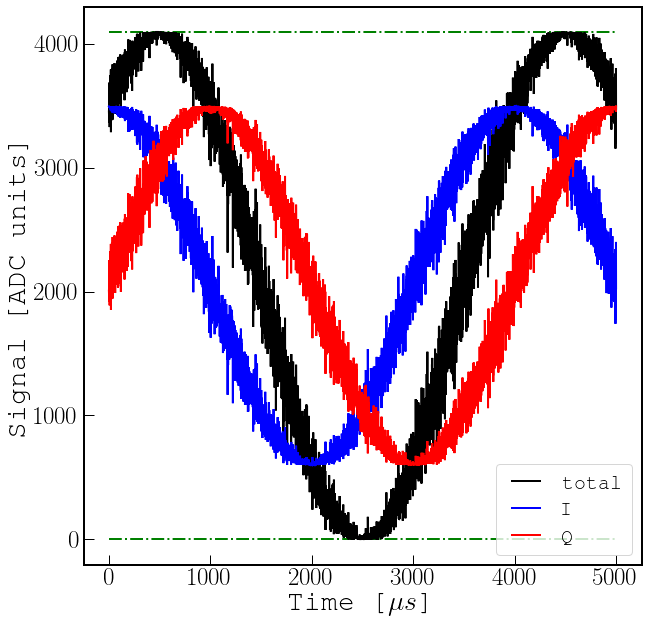

In [21]:
maxp = 5000
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t[:maxp], toADCunits(y[:maxp]), 'k', label='total')
ax.plot(t[:maxp], toADCunits(I[:maxp]), 'b', label='I')
ax.plot(t[:maxp], toADCunits(Q[:maxp]), 'r', label='Q')
ax.hlines(levels[-1], t[0].value, t[maxp].value, colors='g', linestyles='dashdot')
ax.hlines(levels[0], t[0].value, t[maxp].value, colors='g', linestyles='dashdot')
ax.set_xlabel('Time [$\mu s$]')
ax.set_ylabel('Signal [ADC units]')
ax.legend(loc='lower right');

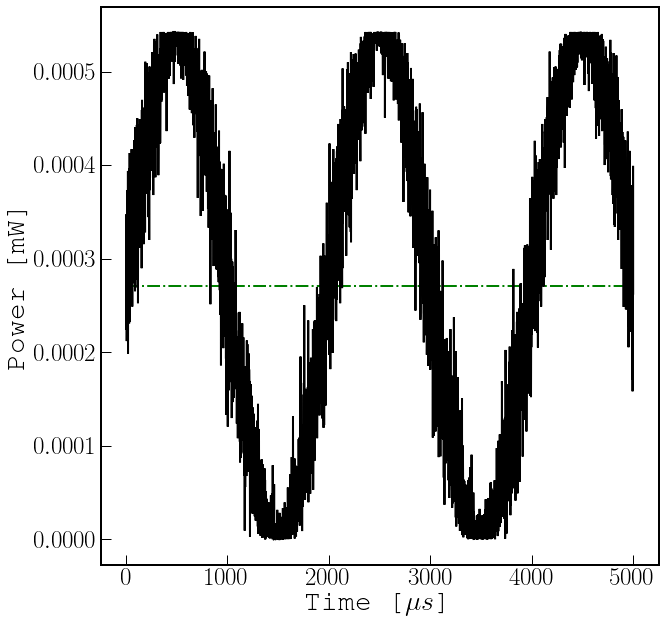

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t[:maxp], P[:maxp], 'k')
ax.hlines(np.mean(P).value, t[0].value, t[maxp].value, colors='g', linestyles='dashdot')
ax.set_xlabel('Time [$\mu s$]')
ax.set_ylabel('Power [mW]');

In [23]:
f2 = 280 * u.MHz
I1,Q1,y1 = get_tone(f, 2**1.5)
I2,Q2,y2 = get_tone(f2, 2**1.5)
P1 = get_tone_power(f, y1)
P2 = get_tone_power(f, y2)
yt = y1 + y2
It = I1 + I2
Qt = Q1 + Q2
yt[yt > peak_voltage] = peak_voltage
yt[yt < -peak_voltage] = -peak_voltage

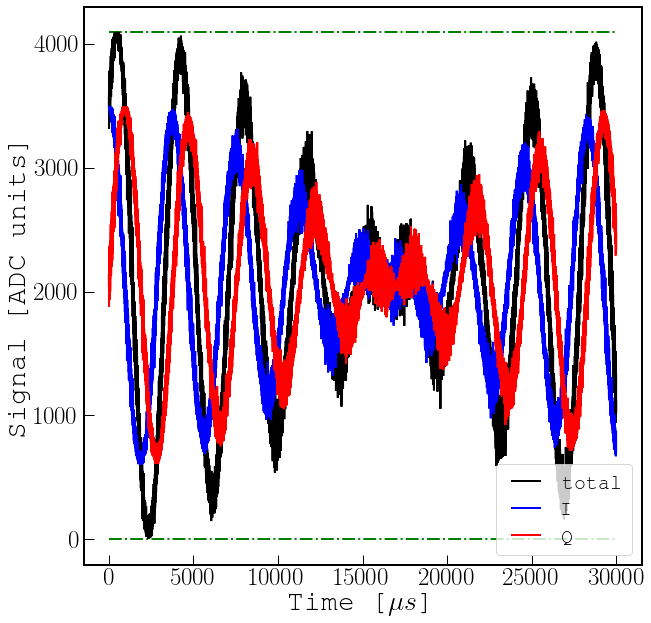

In [24]:
maxp = 30000
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t[:maxp], toADCunits(yt[:maxp]), 'k', label='total')
ax.plot(t[:maxp], toADCunits(It[:maxp]), 'b', label='I')
ax.plot(t[:maxp], toADCunits(Qt[:maxp]), 'r', label='Q')
ax.hlines(levels[-1], t[0].value, t[maxp].value, colors='g', linestyles='dashdot')
ax.hlines(levels[0], t[0].value, t[maxp].value, colors='g', linestyles='dashdot')
ax.set_xlabel('Time [$\mu s$]')
ax.set_ylabel('Signal [ADC units]')
ax.legend(loc='lower right');

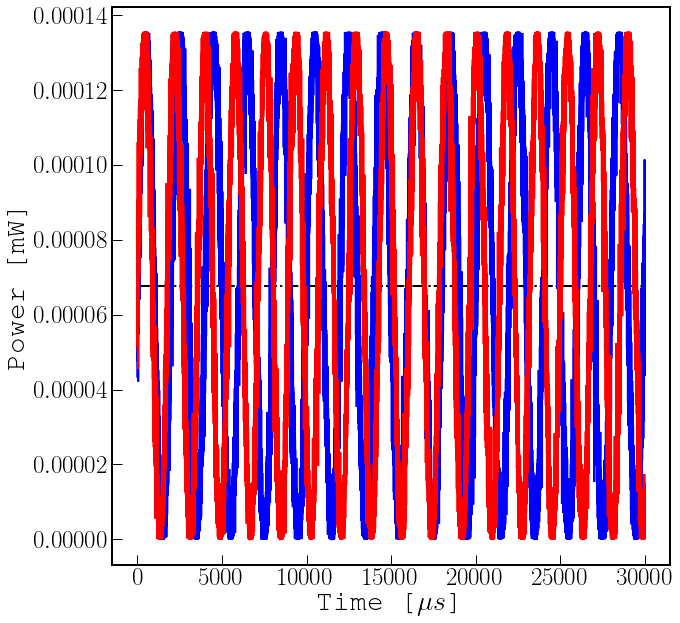

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t[:maxp], P1[:maxp], 'b')
ax.plot(t[:maxp], P2[:maxp], 'r')
ax.hlines(np.mean(P1).value, t[0].value, t[maxp].value, colors='g', linestyles='dashdot')
ax.hlines(np.mean(P2).value, t[0].value, t[maxp].value, colors='k', linestyles='dashdot')
ax.set_xlabel('Time [$\mu s$]')
ax.set_ylabel('Power [mW]');

In [26]:
np.mean(P)/np.mean(P1)

<Quantity 4.000460987007647>

In [46]:
np.random.randn?